<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/Find_best_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
from torch import tensor
from torch.nn import Linear,ReLU,Sigmoid
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sns

# data

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

bos = load_boston()
df = pd.DataFrame(bos.data)
df.columns = bos.feature_names
df['Price'] = bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 特徵縮放

In [4]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Price',axis=1)
y = df['Price']

mm = MinMaxScaler().fit(X)
X[:] = mm.transform(X[:])

X.join(y).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


# 向量化

In [0]:
X = X.to_numpy()
Y = y.to_numpy()

# 切分資料集

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


# tensor化

In [7]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

torch.Size([354, 13])
torch.Size([152, 13])
torch.Size([354, 1])
torch.Size([152, 1])


# Construct the neural network

In [8]:
def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,256),ReLU(),
      Linear(256,128),ReLU(),
      Linear(128,64),ReLU(),
      Linear(64,32),ReLU(),
      Linear(32,16),ReLU(),
      Linear(16,8),ReLU(),
      Linear(8,output_shape)
      )
  return net

def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform(m.weight)
    m.bias.data.fill_(0)

net = build_net(X_train.shape[1],Y_train.shape[1])
net.apply(init_weights)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


Sequential(
  (0): Linear(in_features=13, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=16, bias=True)
  (9): ReLU()
  (10): Linear(in_features=16, out_features=8, bias=True)
  (11): ReLU()
  (12): Linear(in_features=8, out_features=1, bias=True)
)

In [9]:
# test
mini_batch = X_train[0:5]
net(mini_batch)

tensor([[-0.0054],
        [-0.0075],
        [-0.0088],
        [-0.0174],
        [-0.0088]], grad_fn=<AddmmBackward>)

# The usage of DataLoader

In [0]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=128, shuffle=True)

# Loss function and optimizer

In [0]:
loss_function = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr=0.00015)

# Training and evaluation

In [0]:
def train(net,train_iter,loss_function,optimizer,num_epochs=500):
  history = []
  for epoch in range(num_epochs):
    for x,y in train_iter:
      loss = loss_function(net(x),y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  # return trained net
  return net

epochs 0 loss 582.7334
epochs 1 loss 661.3202
epochs 2 loss 564.4409
epochs 3 loss 656.4282
epochs 4 loss 652.6035
epochs 5 loss 574.5196
epochs 6 loss 570.5018
epochs 7 loss 559.3229
epochs 8 loss 605.3626
epochs 9 loss 646.0032
epochs 10 loss 601.2435
epochs 11 loss 717.0831
epochs 12 loss 592.5663
epochs 13 loss 545.9656
epochs 14 loss 668.2105
epochs 15 loss 533.1888
epochs 16 loss 627.1813
epochs 17 loss 559.3724
epochs 18 loss 633.3301
epochs 19 loss 575.1600
epochs 20 loss 701.0846
epochs 21 loss 606.5624
epochs 22 loss 581.2178
epochs 23 loss 632.2497
epochs 24 loss 692.0704
epochs 25 loss 579.5356
epochs 26 loss 619.0437
epochs 27 loss 555.9949
epochs 28 loss 650.9769
epochs 29 loss 609.7061
epochs 30 loss 656.8992
epochs 31 loss 536.2114
epochs 32 loss 532.0053
epochs 33 loss 584.9078
epochs 34 loss 484.2990
epochs 35 loss 536.1644
epochs 36 loss 527.2055
epochs 37 loss 557.5618
epochs 38 loss 471.4313
epochs 39 loss 490.1746
epochs 40 loss 416.0237
epochs 41 loss 389.8960
ep

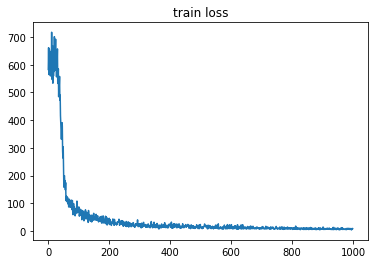

In [13]:
net = train(net,train_iter,loss_function,optimizer,1000)

In [14]:
from sklearn.metrics import r2_score

y_pred = net(X_test).detach().numpy().ravel()
y_real = Y_test.numpy().ravel()
print(y_pred.shape,y_real.shape)
r2_score(y_real,y_pred)

(152,) (152,)


0.8501948551639377

In [0]:
price_model = net

# find the what condition can make high price 

In [0]:
def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,128),
      Linear(128,output_shape),
      Sigmoid()
      )
  return net

In [17]:
net = build_net(10,X_train.shape[1])
net.apply(init_weights)
net

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=13, bias=True)
  (2): Sigmoid()
)

In [18]:
noise = torch.tensor(np.random.normal(size=(5000,10)), dtype=torch.float)
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)
noise_iter

In [19]:
obj_function = lambda x:price_model(x).mean()
obj_function

<function __main__.<lambda>>

In [0]:
optimizer = optim.Adam(net.parameters(),lr=0.0001)

In [0]:
def train2(net,noise_iter,obj_function,optimizer,num_epochs=50):
  history = []
  for epoch in range(num_epochs):
    for noise in noise_iter:
      loss = obj_function(net(noise[0]))
      loss *= -1
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  # return trained net
  return net

epochs 0 loss -7.3849
epochs 1 loss -8.1286
epochs 2 loss -9.0243
epochs 3 loss -10.1824
epochs 4 loss -11.6178
epochs 5 loss -13.5310
epochs 6 loss -16.1087
epochs 7 loss -19.0801
epochs 8 loss -22.0565
epochs 9 loss -24.8233
epochs 10 loss -27.3624
epochs 11 loss -29.7932
epochs 12 loss -32.0514
epochs 13 loss -34.1244
epochs 14 loss -36.1093
epochs 15 loss -38.0056
epochs 16 loss -39.8377
epochs 17 loss -41.5973
epochs 18 loss -43.2691
epochs 19 loss -44.8830
epochs 20 loss -46.4043
epochs 21 loss -47.9004
epochs 22 loss -49.4716
epochs 23 loss -51.0199
epochs 24 loss -52.4569
epochs 25 loss -53.8134
epochs 26 loss -55.1349
epochs 27 loss -56.4482
epochs 28 loss -57.7335
epochs 29 loss -58.9432
epochs 30 loss -60.1984
epochs 31 loss -61.5224
epochs 32 loss -63.0585
epochs 33 loss -65.3749
epochs 34 loss -68.6671
epochs 35 loss -72.0164
epochs 36 loss -74.3194
epochs 37 loss -75.7662
epochs 38 loss -76.7569
epochs 39 loss -77.5727
epochs 40 loss -78.2346
epochs 41 loss -78.7973
epoch

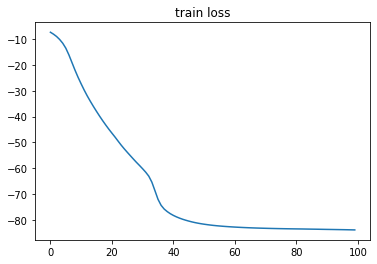

In [22]:
G = train2(net,noise_iter,obj_function,optimizer,num_epochs=100)

In [23]:
a = pd.DataFrame(G(noise).detach().numpy(),columns = bos.feature_names)
b = pd.Series(price_model(G(noise)).detach().numpy().ravel(),name='price')

a[:] = mm.inverse_transform(a[:])
res = a.join(b)
res = round(res,2) 
res

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.08,99.820000,27.650000,1.00,0.39,8.78,87.269997,1.14,23.950001,187.729996,12.61,396.500000,1.76,83.809998
1,0.13,99.830002,27.700001,1.00,0.39,8.77,99.919998,1.14,23.950001,192.899994,12.61,396.119995,1.76,83.970001
2,0.08,99.690002,27.690001,1.00,0.39,8.77,99.900002,1.14,23.969999,189.610001,12.61,396.299988,1.76,84.000000
3,0.11,99.809998,27.680000,1.00,0.39,8.77,99.529999,1.14,23.950001,189.869995,12.61,396.320007,1.76,83.980003
4,0.09,99.760002,27.650000,0.99,0.39,8.78,71.430000,1.14,23.940001,187.460007,12.61,396.399994,1.76,83.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.10,99.809998,27.700001,1.00,0.39,8.77,99.980003,1.14,23.959999,190.309998,12.61,396.149994,1.76,84.000000
4996,0.19,99.769997,27.670000,1.00,0.39,8.78,75.230003,1.14,23.940001,187.490005,12.61,396.440002,1.76,83.629997
4997,0.07,99.699997,27.610001,0.99,0.39,8.78,68.059998,1.14,23.950001,187.589996,12.61,396.540009,1.76,83.519997
4998,0.10,99.849998,27.660000,1.00,0.39,8.78,95.540001,1.14,23.950001,188.179993,12.61,396.440002,1.76,83.919998


In [24]:
res.loc[[res['price'].argmax()]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
92,0.05,99.779999,27.65,1.0,0.39,8.78,99.800003,1.14,23.959999,189.669998,12.61,396.279999,1.75,84.029999


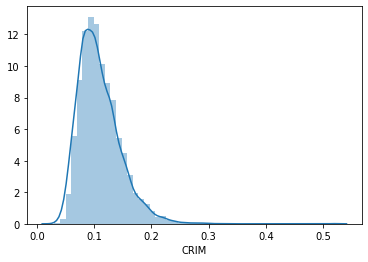

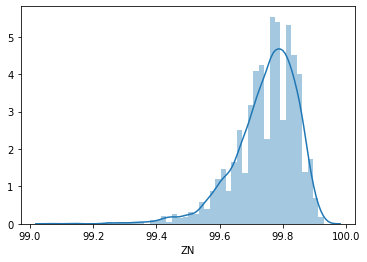

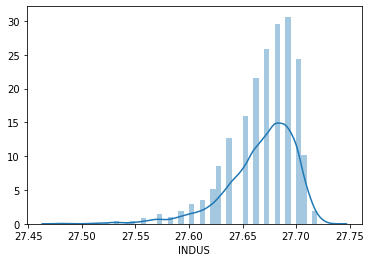

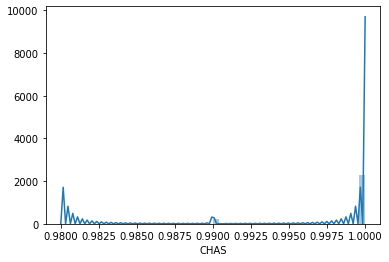

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


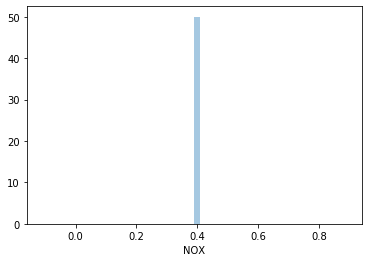

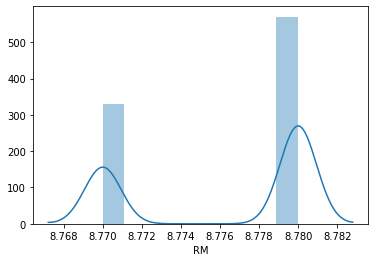

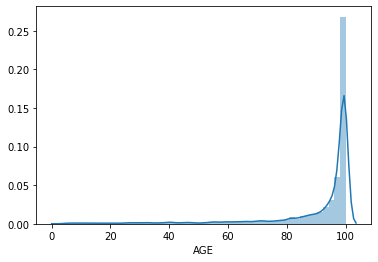

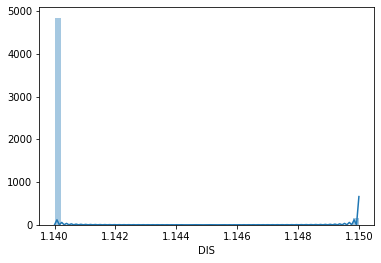

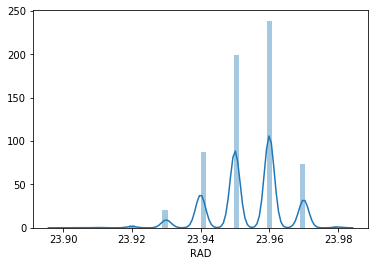

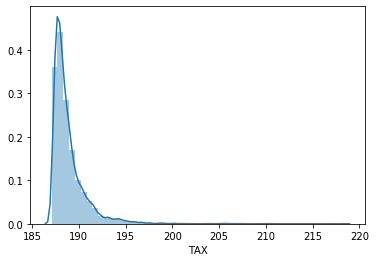

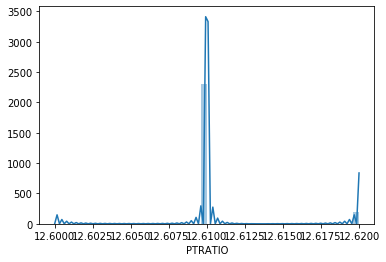

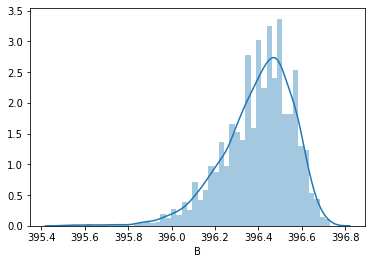

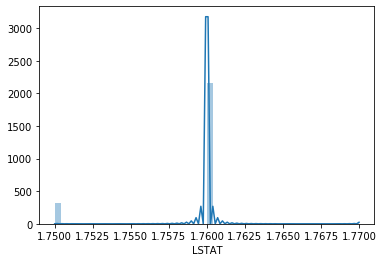

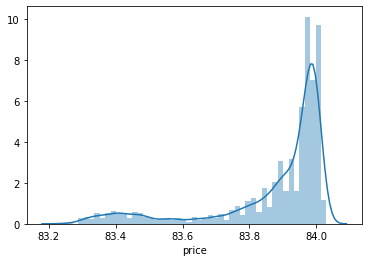

In [25]:
for i in res.columns:
  sns.distplot(res[i])
  plt.show()